In [1]:
# 라이브러리 호출
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

mpl.rc('font', family = 'Malgun Gothic')

# 제조 / 공정 데이터 분석

In [2]:
df1 = pd.read_csv('./data/07_Data.csv') # PCB 공정에서 발생한 오류메시지에 대한 데이터
df1

,메세지,발생시간,조치시간,정지시간,정지시간2,모델,제품두께,제품싸이즈,작업구분,작업자,온도,습도
0,e-CIM 관련에러,2015-06-17T07:32:42,2015-06-17T07:32:54,0시 00분 12초,11.970,78FBGA 7.5x11 CGHB08154 REV.1,0.25,415-515,야간,이은미,22.5,47.3
1,Door Open,2015-06-17T07:32:42,2015-06-17T07:32:54,0시 00분 12초,11.970,78FBGA 7.5x11 CGHB08154 REV.1,0.25,415-515,야간,이은미,22.5,47.3
2,롯트 종료,2015-06-17T07:33:00,2015-06-17T07:33:05,0시 00분 04초,4.093,78FBGA 7.5x11 CGHB08154 REV.2,1.25,415-516,야간,이은미,22.5,47.3
3,Door Open,2015-06-17T07:36:25,2015-06-17T07:36:29,0시 00분 04초,4.093,78FBGA 7.5x11 CGHB08154 REV.3,2.25,415-517,야간,이은미,22.5,47.3
4,Door Open,2015-06-17T07:37:54,2015-06-17T07:41:58,0시 04분 04초,244.350,78FBGA 7.5x11 CGHB08154 REV.4,3.25,415-518,야간,이은미,22.5,47.3
...,...,...,...,...,...,...,...,...,...,...,...,...
2787,메가진 Full,2015-06-24T12:24:04,2015-06-24T12:28:17,0시 04분 13초,252.560,NaN,NaN,NaN,주간,NaN,22.5,47.3
2788,Door Open,2015-06-24T12:54:42,2015-06-24T12:55:08,0시 00분 26초,25.956,NaN,NaN,NaN,주간,NaN,22.5,47.3
2789,메가진 Full,2015-06-24T12:55:08,2015-06-24T12:55:16,0시 00분 08초,8.063,NaN,NaN,NaN,주간,NaN,22.5,47.3
2790,롯트 종료,2015-06-24T12:55:16,2015-06-24T12:55:20,0시 00분 04초,4.281,NaN,NaN,NaN,주간,NaN,22.5,47.3


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2792 entries, 0 to 2791
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   메세지     2792 non-null   object 
 1   발생시간    2792 non-null   object 
 2   조치시간    2792 non-null   object 
 3   정지시간    2792 non-null   object 
 4   정지시간2   2792 non-null   float64
 5   모델      1112 non-null   object 
 6   제품두께    1112 non-null   object 
 7   제품싸이즈   1112 non-null   object 
 8   작업구분    2792 non-null   object 
 9   작업자     1112 non-null   object 
 10  온도      2792 non-null   float64
 11  습도      2792 non-null   float64
dtypes: float64(3), object(9)
memory usage: 261.9+ KB


In [4]:
df1['제품두께'].unique()

array(['0.25', '1.25', '2.25', '3.25', '4.25', '5.25', '6.25', '7.25',
       '8.25', '9.25', '10.25', '11.25', '12.25', '13.25', '14.25',
       '15.25', '16.25', nan, '0.13', '1.13', '2.13', '3.13', '4.13',
       '5.13', '6.13', '7.13', '8.13', '9.13', '10.13', '11.13', '12.13',
       '0.15', '0.17', '0.32', '415-515', '417-518', '0.21', '0.38',
       '0.18', '0.26', '0.56', '0.36', '0.12', '0.1', '0.255', '0.3'],
      dtype=object)

In [5]:
df1['제품두께(float)'] = df1['제품두께'].replace({'415-515' : 4.15,
            '417-518' : 4.17}).astype(float)

In [6]:
# 오류메시지 유형에는 어떤 것이 있으며, 어떤 오류가 가장 많이 발생할까?
df1['메세지'].value_counts()

Door Open         1345
자재 픽업 에러           425
비젼 가동 준비 Error     234
롯트 종료              229
초기화 Error          215
e-CIM 관련에러         133
메가진 Full           119
타임 오버               45
SYSTEM HANG UP      35
비젼 데이터               6
ITS 데이터              3
드라이버 알람              2
컨드롤러 알람              1
Name: 메세지, dtype: int64

##### 파레토도 시각화

In [7]:
# 1. 빈도수 확인
# 2. 누적확률 확인

# 오류 메세지의 80%에 해당하는 오류를 찾아서 조치를 취해야 함
df2 = pd.DataFrame(df1['메세지'].value_counts()).reset_index()
# 메세지 항목의 빈도수 결과를 DF형태로 변환
df_error = df2.rename(columns = {'index' : '오류메시지', '메세지' : '빈도수'})
df_error

,오류메시지,빈도수
0,Door Open,1345
1,자재 픽업 에러,425
2,비젼 가동 준비 Error,234
3,롯트 종료,229
4,초기화 Error,215
5,e-CIM 관련에러,133
6,메가진 Full,119
7,타임 오버,45
8,SYSTEM HANG UP,35
9,비젼 데이터,6


In [8]:
# 빈도수를 이용해, 비율 계산
df_error['비율'] = df_error['빈도수'] / df_error['빈도수'].sum()
df_error

,오류메시지,빈도수,비율
0,Door Open,1345,0.481734
1,자재 픽업 에러,425,0.152221
2,비젼 가동 준비 Error,234,0.083811
3,롯트 종료,229,0.082020
4,초기화 Error,215,0.077006
5,e-CIM 관련에러,133,0.047636
6,메가진 Full,119,0.042622
7,타임 오버,45,0.016117
8,SYSTEM HANG UP,35,0.012536
9,비젼 데이터,6,0.002149


In [9]:
# 누적 비율 합을 계산
# cumsum
df_error['누적비율'] = df_error['비율'].cumsum()
df_error

,오류메시지,빈도수,비율,누적비율
0,Door Open,1345,0.481734,0.481734
1,자재 픽업 에러,425,0.152221,0.633954
2,비젼 가동 준비 Error,234,0.083811,0.717765
3,롯트 종료,229,0.082020,0.799785
4,초기화 Error,215,0.077006,0.876791
5,e-CIM 관련에러,133,0.047636,0.924427
6,메가진 Full,119,0.042622,0.967049
7,타임 오버,45,0.016117,0.983166
8,SYSTEM HANG UP,35,0.012536,0.995702
9,비젼 데이터,6,0.002149,0.997851


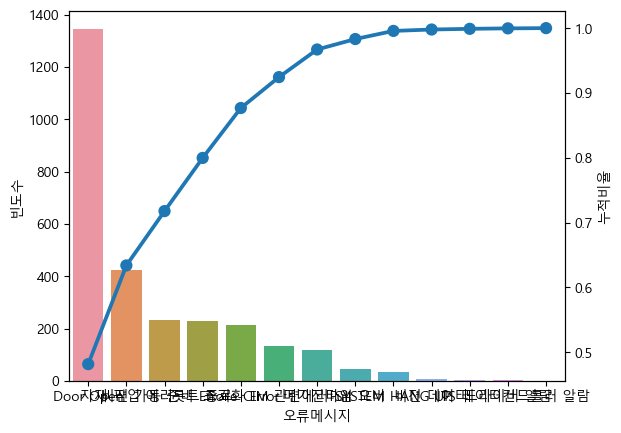

In [10]:
img1 = sns.barplot(data=df_error, x = '오류메시지',y='빈도수')
plt.twinx(img1) # x축만 공유한 채로, y축을 재설정하여, 그래프를  
                # 각각의 스케일 맞게 조정
sns.pointplot(data=df_error, x = '오류메시지', y='누적비율')
plt.show()

<AxesSubplot: xlabel='누적비율', ylabel='오류메시지'>

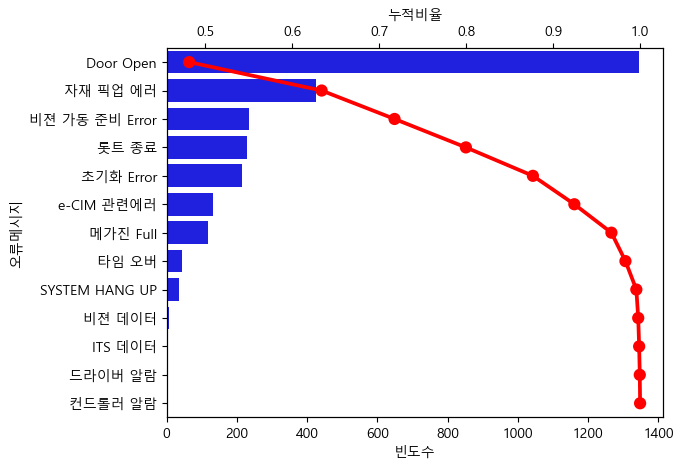

In [11]:
img1 = sns.barplot(data=df_error, y = '오류메시지', x='빈도수', color = 'b')
plt.twiny(img1) # x축만 공유한 채로, y축을 재설정하여, 그래프를  
                # 각각의 스케일 맞게 조정
sns.pointplot(data=df_error, y= '오류메시지', x ='누적비율', color = 'r')

# Mission 6
- 07_Data.csv파일로 df1으로 선언된 데이터를 이용해, 아래의 문제를 해결하자

In [12]:
# 1. df1에서 '메세지'의 빈도수가 높은 상위 4개 항목(공정 불량에 80%에 해당하는 에러)을 추출하여
# df1_outlier변수로 선언

df1_outlier = df1.loc[df1['메세지'].isin(df1['메세지'].value_counts().head(4).index)]
df1_outlier['메세지'].value_counts()

Door Open         1345
자재 픽업 에러           425
비젼 가동 준비 Error     234
롯트 종료              229
Name: 메세지, dtype: int64

In [13]:
# 2. df1_outlier 에서, '작업구분'에 따른 '정지시간2'의 평균을 계산
p1 = df1_outlier.pivot_table(index = '작업구분', values = '정지시간2', aggfunc = 'mean').reset_index()
p1

,작업구분,정지시간2
0,야간,48.608097
1,주간,71.454121


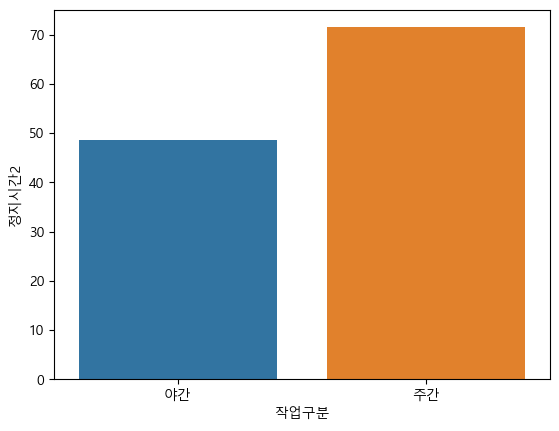

In [14]:
# 3. df1_outlier 에서, '작업구분'에 따른 '정지시간2'의 평균을 시각화
sns.barplot(data = p1, x = '작업구분', y = '정지시간2')
plt.show()

In [15]:
# 4. df1_outlier 에서, '작업구분'에 따른 '정지시간2'의 가설검정 실시

# 1) 정지시간2의 정규성 검정
# H0 : 정지시간2 의 분포는 정규성을 따른다.
# H1 : 정지시간2 의 분포는 정규성을 따르지 않는다.
stats.normaltest(df1_outlier['정지시간2'])
# p-value < 0.05 이므로 H0 기각
# 따라서 정규성을 따르지 않는다.

NormaltestResult(statistic=4549.4650473504635, pvalue=0.0)

In [16]:
# 2) 정규성을 따르지 않으므로 윌콕슨 순위합 검정
# H0 : 작업구분이 야간과 주간에 따른 정지시간2의 평균은 차이가 없다.
# H1 : 작업구분이 야간과 주간에 따른 정지시간2의 평균은 차이가 있다.
df1_outlier_1 = df1_outlier.loc[df1_outlier['작업구분'] == '주간']
df1_outlier_2 = df1_outlier.loc[df1_outlier['작업구분'] == '야간']
stats.ranksums(df1_outlier_1['정지시간2'], df1_outlier_2['정지시간2'])
# p-value > 0.05 이므로 H0 채택
# 따라서 야간과 주간의 정지시간2의 평균 차이는 없다고 볼 수 있다.

RanksumsResult(statistic=1.4339884475806373, pvalue=0.1515755595892694)

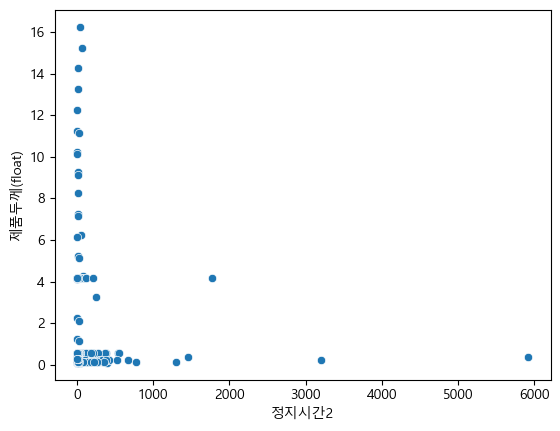

In [17]:
# 5. df1_outlier 에서, '정지시간2'와 '제품두께(float)'의 산점도 시각화
sns.scatterplot(data=df1_outlier, x ='정지시간2', y ='제품두께(float)')
plt.show()

In [18]:
# 6. df1_outlier 에서, '정지시간2'가 높은 상위 100개의 데이터를 확인
df1_outlier.sort_values(by = '정지시간2', ascending = False).head(100)

,메세지,발생시간,조치시간,정지시간,정지시간2,모델,제품두께,제품싸이즈,작업구분,작업자,온도,습도,제품두께(float)
2167,Door Open,2015-06-22T17:40:15,2015-06-22T20:04:06,2시 23분 51초,8630.50,NaN,NaN,NaN,주간,NaN,22.5,47.3,NaN
2100,Door Open,2015-06-22T11:41:40,2015-06-22T13:47:15,2시 05분 35초,7535.10,NaN,NaN,NaN,주간,NaN,22.5,47.3,NaN
807,Door Open,2015-06-18T22:00:44,2015-06-18T23:39:23,1시 38분 39초,5918.70,038072E A(R001-9116U)(ITS-A)(update strip),0.38,415-515,야간,장다혜,22.5,47.3,0.38
1442,자재 픽업 에러,2015-06-20T11:07:17,2015-06-20T12:39:04,1시 31분 47초,5507.20,NaN,NaN,NaN,주간,NaN,22.5,47.3,NaN
2088,Door Open,2015-06-22T10:19:26,2015-06-22T11:32:36,1시 13분 10초,4390.20,NaN,NaN,NaN,주간,NaN,22.5,47.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,Door Open,2015-06-17T19:59:24,2015-06-17T20:03:06,0시 03분 42초,222.49,NaN,NaN,NaN,주간,NaN,22.5,47.3,NaN
37,비젼 가동 준비 Error,2015-06-17T08:35:50,2015-06-17T08:39:30,0시 03분 40초,220.29,NaN,NaN,NaN,주간,NaN,22.5,47.3,NaN
1048,롯트 종료,2015-06-19T13:47:56,2015-06-19T13:51:36,0시 03분 40초,220.23,01064133-1-48,0.18,415-515,주간,임내순,22.5,47.3,0.18
2659,Door Open,2015-06-24T05:20:25,2015-06-24T05:24:04,0시 03분 38초,218.33,(MicroSD) 54-50-04314-DBP-R1A-33,0.13,415-515,야간,임내순,22.5,47.3,0.13


In [19]:
# 7. df1_outlier 에서, '작업자'의 항목과 빈도수를 확인
top_list = df1_outlier['작업자'].value_counts()
top_list

최이슬    367
임내순    209
박상훈     92
이은미     90
장다혜     71
정승희     60
김동진     17
Name: 작업자, dtype: int64

In [20]:
# 8. df1_outlier 에서, '작업자'의 빈도수가 가장 높은 3명에 대해 '작업자'별 '정지시간2'의 평균/최소/최대값 계산
q8 = df1_outlier.loc[df1_outlier['작업자'].isin(top_list.head(3).index)]
q8.pivot_table(index = '작업자', values = '정지시간2', aggfunc = ['mean','min','max'])

,mean,min,max
,정지시간2,정지시간2,정지시간2
작업자,,,
박상훈,41.441989,2.063,666.97
임내순,36.195861,1.391,342.77
최이슬,50.696828,1.922,3196.40


- 08_Data.csv (반도체 공정에서 Etching 공정에서 발생한 실제 데이터)데이터를 가져와, df3로 선언후, 아래의 문제를 해결 

In [21]:
# 9. df3의 구조와 타입을 확인하고, 연속형 데이터의 평균/중앙값/표준편차를 확인
df3 = pd.read_csv('./data/08_Data.csv')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 67 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           311 non-null    object 
 1   Target         303 non-null    float64
 2   Etching1       311 non-null    float64
 3   Etching2       311 non-null    float64
 4   Etching3       311 non-null    float64
 5   CVD1           311 non-null    float64
 6   CVD2           311 non-null    float64
 7   CVD3           311 non-null    float64
 8   Photo1         311 non-null    float64
 9   Photo2         311 non-null    float64
 10  D2TI13027 24   311 non-null    float64
 11  D2TI13029 18   311 non-null    float64
 12  D2TI13029 19   311 non-null    float64
 13  D2TI13029 20   311 non-null    float64
 14  D2TI13030 1    311 non-null    float64
 15  D2TI13031 21   311 non-null    float64
 16  D2TI13032 16   311 non-null    float64
 17  D2TI13047 20   311 non-null    float64
 18  D2TI13050 

In [22]:
df3.describe().head(3)

,Target,Etching1,Etching2,Etching3,CVD1,CVD2,CVD3,Photo1,Photo2,D2TI13027 24,...,D2TI17106 5,D2TI17107 14,D2TI17109 6,D2TI17109 9,D2TI17109 14,D2TI17109 15,D2TI18038 13,D2TIC13007 7,D2TIC13007 8,D2TIC13111 11
count,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,...,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,0.509241,32.638927,30.561051,0.071898,0.025756,0.012729,11.934937,15.923694,70.747232,202.257701,...,137.587040,119.354150,149.696091,149.708563,149.655876,149.628785,157.733457,128.021247,127.939578,190.976201
std,0.471204,4.224098,7.865913,0.857433,0.264043,0.002208,12.718985,16.866122,5.053837,5.897030,...,8.345374,7.373823,2.982833,2.939580,2.890538,2.890104,3.175006,1.897572,0.983469,5.733196


In [23]:
# 10. df3에서, 'Etching1'항목을 34 기준으로 34이상이면 A, 34 미만이면 B로 변경하여 '분류'라는 새로운 파생변수를 생성
df3['분류'] = 'B'
df3.loc[df3['Etching1'] >= 34, '분류'] = 'A'
df3['분류'].value_counts()

B    180
A    131
Name: 분류, dtype: int64

In [24]:
# 11. '분류'에 따른 'Photo1'값과 'Photo2'값의 합/평균을 확인
# CRM 데이터인 경우 : 합 / 평균 / 최대값 (매출 / 방문수 / VOC / ...)
# 공정 데이터인 경우 : 평균 / 표준편차 / 중앙값 / 범위

df3.pivot_table(index = '분류', values = ['Photo1','Photo2'], aggfunc = ['sum','mean'])

sum                     mean           
         Photo1        Photo2     Photo1     Photo2
분류                                                 
A   2020.854284   9129.070599  15.426369  69.687562
B   2931.414587  12873.318680  16.285637  71.518437

In [25]:
# 12. '분류'에서 A항목에 해당하는 데이터를 뽑아
# 'Photo1'데이터의 분포의 80%이상에 해당하는 데이터를 추출하여, result_A_photo80.xlsx 저장
df3.loc[(df3['분류'] == 'A') & (df3['Photo1'] >= df3['Photo1'].quantile(0.8))].to_excel('./실습 저장파일/result_A_photo80.xlsx')

In [26]:
# 13. 'DATE'항목에서 '월'을 추출하여,'월' 별 'CVD1'/ 'CVD2' / 'CVD3' 값의 중앙값을 계산하시오.
df3['DATE_new'] = pd.to_datetime(df3['DATE'])
df3['월'] = df3['DATE_new'].dt.month
df3.pivot_table(index = '월', values =['CVD1','CVD2','CVD3'], aggfunc = 'median')

,CVD1,CVD2,CVD3
월,,,
1,0.005980,0.010318,0.016995
3,0.008018,0.010452,0.069559
5,0.013193,0.013532,0.018583
6,0.013637,0.014302,0.019814
7,0.019305,0.016677,26.249998
9,0.013598,0.014816,16.274105
10,0.008840,0.012347,0.018281
11,0.008380,0.011771,26.249998


In [27]:
# 14. df3에서 'Target'값의 분포에 25%미만은 D, 25%~50% C, 50%~75% B, 75%~100% A로 바꾸어 Target_group'이라는 변수로 선언한 뒤
# A/B그룹과 C/D그룹의 'CVD1'의 평균의 차이를 가설검정을 통해 확인하는 프로그램 구성 (함수형태로 구성)

In [28]:
# 1. df3에서 Target값의 분포에 따른 Target_group 파생변수 생성
df3['Target_group'] = 'D'
df3.loc[df3['Target'] >= df3['Target'].quantile(0.25), 'Target_group'] = 'C'
df3.loc[df3['Target'] >= df3['Target'].quantile(0.50), 'Target_group'] = 'B'
df3.loc[df3['Target'] >= df3['Target'].quantile(0.75), 'Target_group'] = 'A'
df3['Target_group'].value_counts()

C    99
B    86
A    85
D    41
Name: Target_group, dtype: int64

In [29]:
def CVD1_hypo(data):
    data_AB = data.loc[data['Target_group'].isin(['A','B'])]
    data_CD = data.loc[data['Target_group'].isin(['C','D'])]
    
    print('''
'CVD1'의 정규성 검정 실시 :
H0 : CVD1의 분포는 정규성을 따른다.
H1 : CVD1의 분포는 정규성을 따르지 않는다.
    ''')
    res_normal = stats.normaltest(data['CVD1'])
    if res_normal[1] < 0.05:
        print(f'검정 결과 : p-value 값은 {res_normal[1]} 이므로 H0을 기각한다. 즉, CVD1의 분포는 정규성을 띄지 않는다.')
        
    
    
        print('==' * 60)
        print('''
AB , CD 그룹에 따른 평균검정 실시
H0 : AB와 CD에 대한 CVD1의 평균차이는 없다.
H1 : AB와 CD에 대한 CVD1의 평균차이는 있다.
        ''')
        res_rank = stats.ranksums(data_AB['CVD1'], data_CD['CVD1'])
        
        if res_rank[1] < 0.05:
            print(f'검정 결과 : p-value 값은 {res_rank[1]} 이므로 H0을 기각한다. 즉, AB와 CD에 대한 CVD1의 평균차이는 있다.')
            print('==' * 60)
        else:
            print(f'검정 결과 : p-value 값은 {res_rank[1]} 이므로 H0을 채택한다. 즉, AB와 CD에 대한 CVD1의 평균차이는 없다.')
            print('==' * 60)
            
        
    else:
        print(f'검정 결과 : p-value 값은 {res_normal[1]} 이므로 H0을 채택한다. 즉, CVD1의 분포는 정규성을 띈다.')
        print('==' * 60)
    
    
        print('''
'CVD1'의 등분산 검정 실시
H0 : 두 집단간 CVD1의 분산은 같다.
H1 : 두 집단간 CVD1의 분산은 다르다.
        ''')
        res_std = stats.bartlett(data_AB['CVD1'], data_CD['CVD1'])
        if res_std < 0.05:
            print(f'검정 결과 : p-value 값은 {res_std[1]} 이므로 H0을 기각한다. 즉, 두 집단간 ''CVD1''의 분산은 다르다.')
            print('==' * 60)
            
            print('''
AB , CD 그룹에 따른 평균검정 실시(이분산 가정하에)
H0 : AB와 CD에 대한 CVD1의 평균차이는 없다.
H1 : AB와 CD에 대한 CVD1의 평균차이는 있다.
            ''')
            
            res_ttest_dif_var = stats.ttest_ind(data_AB['CVD1'], data_CD['CVD1'], equal_var=False)[1]
            if res_ttest_dif_var < 0.05:
                print(f'검정 결과 : p-value 값은 {res_ttest_dif_var[1]} 이므로 H0을 기각한다. 즉, 두 집단간 ''CVD1''의 평균 차이는 있다.')
                print('==' * 60)
            
            else:
                print(f'검정 결과 : p-value 값은 {res_ttest_dif_var[1]} 이므로 H0을 채택한다. 즉, 두 집단간 ''CVD1''의 평균 차이는 없다.')
                print('==' * 60)
                
                
        else:
            print(f'검정 결과 : p-value 값은 {res_std[1]} 이므로 H0을 채택한다. 즉, 두 집단간 ''CVD1''의 분산은 같다.')
            print('==' * 60)
            
            print('''
AB , CD 그룹에 따른 평균검정 실시(등분산 가정하에)
H0 : AB와 CD에 대한 CVD1의 평균차이는 없다.
H1 : AB와 CD에 대한 CVD1의 평균차이는 있다.
            ''')
            
            res_ttest_eql_var = stats.ttest_ind(data_AB['CVD1'], data_CD['CVD1'], equal_var=True)[1]
            if res_ttest_dif_var < 0.05:
                print(f'검정 결과 : p-value 값은 {res_ttest_eql_var[1]} 이므로 H0을 기각한다. 즉, 두 집단간 ''CVD1''의 평균 차이는 있다.')
                print('==' * 60)
            
            else:
                print(f'검정 결과 : p-value 값은 {res_ttest_eql_var[1]} 이므로 H0을 채택한다. 즉, 두 집단간 ''CVD1''의 평균 차이는 없다.')       
                print('==' * 60)

In [30]:
CVD1_hypo(df3)


'CVD1'의 정규성 검정 실시 :
H0 : CVD1의 분포는 정규성을 따른다.
H1 : CVD1의 분포는 정규성을 따르지 않는다.
    
검정 결과 : p-value 값은 3.468430959933392e-157 이므로 H0을 기각한다. 즉, CVD1의 분포는 정규성을 띄지 않는다.

AB , CD 그룹에 따른 평균검정 실시
H0 : AB와 CD에 대한 CVD1의 평균차이는 없다.
H1 : AB와 CD에 대한 CVD1의 평균차이는 있다.
        
검정 결과 : p-value 값은 0.6841030466952207 이므로 H0을 채택한다. 즉, AB와 CD에 대한 CVD1의 평균차이는 없다.
